In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.special as spec
import matplotlib.pyplot as plt

In [93]:
def myFnc(x):
    return np.sin(x);

def removeErroniusZeros(zeros, minzero, maxzero, fnc, *args):
    refined_zeros = []
    
    for i in range(len(zeros)):
        if zeros[i] >= minzero:
            if zeros[i] <= maxzero:
                if abs(fnc(zeros[i], args[0])) <= 0.000001:
                    refined_zeros.append(zeros[i])
    
    return refined_zeros;

def getAllZerosInRange(fnc, minx, maxx, stepsize, *myArgs):
    zeros = []
    
    for i in np.arange(minx, maxx, stepsize):
        zeros.append(list(opt.fsolve(fnc, i, args=myArgs[0]))[0])
    
    #print(zeros)
    
    for i in range(len(zeros)):
        zeros[i] = round(zeros[i], 7)
    
    zeros = removeErroniusZeros(list(set(zeros)), minx, maxx, fnc, myArgs[0])
    
    return zeros;

In [94]:
def normSphericalBessel(x, n):
    return x * spec.spherical_jn(n, x);

def normSphericalBesselDerivative(x, n):
    #print(n)
    return (n + 1) * spec.spherical_jn(n, x) - x * spec.spherical_jn(n+1, x);

10


/Users/wentmich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


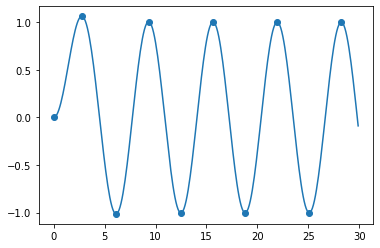

In [95]:
xmax, xmin = 30.0, 0.0

nthBessel = 1

listOfZeros = getAllZerosInRange(normSphericalBesselDerivative, xmin, xmax, 0.1, nthBessel)

print(len(listOfZeros))

xvals = np.arange(xmin, xmax, 0.1)
fncvals = normSphericalBessel(xvals, nthBessel)
zeroHeights = normSphericalBessel(listOfZeros, nthBessel)

plt.plot(xvals, fncvals)
plt.scatter(listOfZeros, zeroHeights)
plt.show()

In [106]:
# make file with all the spherical bessel zeros
maxn = 10
listforsphericalbessels = []
listforsphericalbesselsderiv = []

f = open("norm_spherical_bessel_zeros.txt", 'w')

for n in range(maxn):
    zeros = getAllZerosInRange(normSphericalBessel, xmin, xmax, 0.1, n)
    for i in range(len(zeros) - 1):
        f.write(str(zeros[i]) + ', ')
    f.write(str(zeros[len(zeros) - 1]) + '\n')

f.close()
    
f = open("norm_spherical_bessel_derivatives_zeros.txt", 'w')

for n in range(maxn):
    zeros = getAllZerosInRange(normSphericalBesselDerivative, xmin, xmax, 0.1, n)
    for i in range(len(zeros) - 1):
        f.write(str(zeros[i]) + ', ')
    f.write(str(zeros[len(zeros) - 1]) + '\n')

f.close()

/Users/wentmich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/Users/wentmich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
